# Initialisation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_csv = pd.read_csv('../data/urgences_data.csv', encoding='latin1')

In [3]:
df_csv

,date_heure_arrivee,id_passage,mois,heure,jour_semaine,annee,alerte_epidemique,temperature_max,indicateur_greve,evenement_externe,...,devenir_patient,temps_passage_total,date_heure_arrivee_encoded,alerte_epidemique_encoded,batiment_accueil_encoded,site_accueil_encoded,filiere_pathologie_encoded,mode_transport_encoded,besoin_imagerie_encoded,devenir_patient_encoded
0,01/11/2020 00:05,1000001,11,0,6,2020,Bronchiolite,15.983798,0,0,...,Retour Domicile,341,13518,1,1,0,4,0,1,1
1,01/11/2020 00:05,1000002,11,0,6,2020,Bronchiolite,15.983798,0,0,...,Retour Domicile,335,13518,1,1,0,6,0,1,1
2,01/11/2020 00:47,1000003,11,0,6,2020,Bronchiolite,12.006751,0,0,...,Transfert,254,13519,1,1,0,7,3,0,2
3,01/11/2020 00:54,1000004,11,0,6,2020,Bronchiolite,12.834808,0,0,...,Retour Domicile,298,13520,1,1,0,2,1,1,1
4,01/11/2020 01:24,1000005,11,1,6,2020,Bronchiolite,14.335864,0,0,...,Retour Domicile,228,13521,1,1,0,9,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570277,31/10/2025 23:28,1570278,10,23,4,2025,Aucune,18.639316,0,0,...,Hospitalisation,315,491270,0,2,0,5,2,1,0
570278,31/10/2025 23:32,1570279,10,23,4,2025,Aucune,20.870102,0,0,...,Retour Domicile,455,491271,0,0,0,6,1,1,1
570279,31/10/2025 23:38,1570280,10,23,4,2025,Aucune,19.439946,0,0,...,Retour Domicile,566,491272,0,0,0,6,1,0,1
570280,31/10/2025 23:41,1570281,10,23,4,2025,Aucune,25.419911,0,0,...,Transfert,297,491273,0,1,0,2,1,1,2


# EDA

In [4]:
df_csv.head()

,date_heure_arrivee,id_passage,mois,heure,jour_semaine,annee,alerte_epidemique,temperature_max,indicateur_greve,evenement_externe,...,devenir_patient,temps_passage_total,date_heure_arrivee_encoded,alerte_epidemique_encoded,batiment_accueil_encoded,site_accueil_encoded,filiere_pathologie_encoded,mode_transport_encoded,besoin_imagerie_encoded,devenir_patient_encoded
0,01/11/2020 00:05,1000001,11,0,6,2020,Bronchiolite,15.983798,0,0,...,Retour Domicile,341,13518,1,1,0,4,0,1,1
1,01/11/2020 00:05,1000002,11,0,6,2020,Bronchiolite,15.983798,0,0,...,Retour Domicile,335,13518,1,1,0,6,0,1,1
2,01/11/2020 00:47,1000003,11,0,6,2020,Bronchiolite,12.006751,0,0,...,Transfert,254,13519,1,1,0,7,3,0,2
3,01/11/2020 00:54,1000004,11,0,6,2020,Bronchiolite,12.834808,0,0,...,Retour Domicile,298,13520,1,1,0,2,1,1,1
4,01/11/2020 01:24,1000005,11,1,6,2020,Bronchiolite,14.335864,0,0,...,Retour Domicile,228,13521,1,1,0,9,3,0,1


In [5]:
df_csv.info()

<class 'pandas.DataFrame'>
RangeIndex: 570282 entries, 0 to 570281
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   date_heure_arrivee          570282 non-null  str    
 1   id_passage                  570282 non-null  int64  
 2   mois                        570282 non-null  int64  
 3   heure                       570282 non-null  int64  
 4   jour_semaine                570282 non-null  int64  
 5   annee                       570282 non-null  int64  
 6   alerte_epidemique           570282 non-null  str    
 7   temperature_max             570282 non-null  float64
 8   indicateur_greve            570282 non-null  int64  
 9   evenement_externe           570282 non-null  int64  
 10  niveau_pollution            570282 non-null  int64  
 11  batiment_accueil            570282 non-null  str    
 12  site_accueil                570282 non-null  str    
 13  age_patient              

In [6]:
df_csv["date_heure_arrivee"] = pd.to_datetime(df_csv["date_heure_arrivee"], format='%d/%m/%Y %H:%M')

In [7]:
df_csv.describe(include="all")

,date_heure_arrivee,id_passage,mois,heure,jour_semaine,annee,alerte_epidemique,temperature_max,indicateur_greve,evenement_externe,...,devenir_patient,temps_passage_total,date_heure_arrivee_encoded,alerte_epidemique_encoded,batiment_accueil_encoded,site_accueil_encoded,filiere_pathologie_encoded,mode_transport_encoded,besoin_imagerie_encoded,devenir_patient_encoded
count,570282,5.702820e+05,570282.000000,570282.000000,570282.000000,570282.000000,570282,570282.000000,570282.000000,570282.000000,...,570282,570282.000000,570282.000000,570282.000000,570282.000000,570282.0,570282.000000,570282.000000,570282.00000,570282.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Aucune,NaN,NaN,NaN,...,Retour Domicile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,400410,NaN,NaN,NaN,...,320179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2023-06-11 14:06:34.582574,1.285142e+06,6.434131,13.498804,3.000025,2022.949158,NaN,14.863893,0.018700,0.028968,...,NaN,240.229511,246123.693767,0.717636,1.231906,0.0,5.306508,1.768188,0.68952,0.660742
min,2020-11-01 00:05:00,1.000001e+06,1.000000,0.000000,0.000000,2020.000000,NaN,-7.233993,0.000000,0.000000,...,NaN,30.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
25%,2022-03-23 12:38:15,1.142571e+06,3.000000,9.000000,1.000000,2022.000000,NaN,8.214509,0.000000,0.000000,...,NaN,164.000000,122867.250000,0.000000,1.000000,0.0,4.000000,1.000000,0.00000,0.000000
50%,2023-06-26 14:45:00,1.285142e+06,6.000000,14.000000,3.000000,2023.000000,NaN,14.759514,0.000000,0.000000,...,NaN,232.000000,246023.500000,0.000000,1.000000,0.0,5.000000,2.000000,1.00000,1.000000
75%,2024-09-10 10:11:15,1.427712e+06,9.000000,18.000000,5.000000,2024.000000,NaN,21.517348,0.000000,0.000000,...,NaN,306.000000,369291.750000,1.000000,1.000000,0.0,7.000000,3.000000,1.00000,1.000000
max,2025-10-31 23:57:00,1.570282e+06,12.000000,23.000000,6.000000,2025.000000,NaN,36.587924,1.000000,1.000000,...,NaN,731.000000,492630.000000,4.000000,4.000000,0.0,9.000000,3.000000,1.00000,2.000000


In [8]:
df_csv.isna().value_counts()

date_heure_arrivee  id_passage  mois   heure  jour_semaine  annee  alerte_epidemique  temperature_max  indicateur_greve  evenement_externe  niveau_pollution  batiment_accueil  site_accueil  age_patient  filiere_pathologie  score_IAO  mode_transport  effectif_soignant_present  dispo_lits_aval  besoin_imagerie  consommation_O2  kit_traumatologie  solutes_hydratation  devenir_patient  temps_passage_total  date_heure_arrivee_encoded  alerte_epidemique_encoded  batiment_accueil_encoded  site_accueil_encoded  filiere_pathologie_encoded  mode_transport_encoded  besoin_imagerie_encoded  devenir_patient_encoded
False               False       False  False  False         False  False              False            False             False              False             False             False         False        False               False      False           False                      False            False            False            False              False                False            False

In [9]:
df_csv.isnull().sum()

date_heure_arrivee            0
id_passage                    0
mois                          0
heure                         0
jour_semaine                  0
annee                         0
alerte_epidemique             0
temperature_max               0
indicateur_greve              0
evenement_externe             0
niveau_pollution              0
batiment_accueil              0
site_accueil                  0
age_patient                   0
filiere_pathologie            0
score_IAO                     0
mode_transport                0
effectif_soignant_present     0
dispo_lits_aval               0
besoin_imagerie               0
consommation_O2               0
kit_traumatologie             0
solutes_hydratation           0
devenir_patient               0
temps_passage_total           0
date_heure_arrivee_encoded    0
alerte_epidemique_encoded     0
batiment_accueil_encoded      0
site_accueil_encoded          0
filiere_pathologie_encoded    0
mode_transport_encoded        0
besoin_i

In [10]:
df_csv.duplicated().sum()

np.int64(0)

In [11]:
df_csv["temps_passage_total"].max()

np.int64(731)

In [12]:
df_csv["temps_passage_total"].min()

np.int64(30)

In [13]:
df_csv[["alerte_epidemique", "alerte_epidemique_encoded"]].head()

,alerte_epidemique,alerte_epidemique_encoded
0,Bronchiolite,1
1,Bronchiolite,1
2,Bronchiolite,1
3,Bronchiolite,1
4,Bronchiolite,1


In [14]:
mapping_alerte = (
    df_csv[["alerte_epidemique", "alerte_epidemique_encoded"]]
    .drop_duplicates()
    .sort_values("alerte_epidemique_encoded")
)

mapping_alerte

,alerte_epidemique,alerte_epidemique_encoded
23461,Aucune,0
0,Bronchiolite,1
7,COVID,2
23469,Gastro,3
23474,Grippe,4


# Graphiques

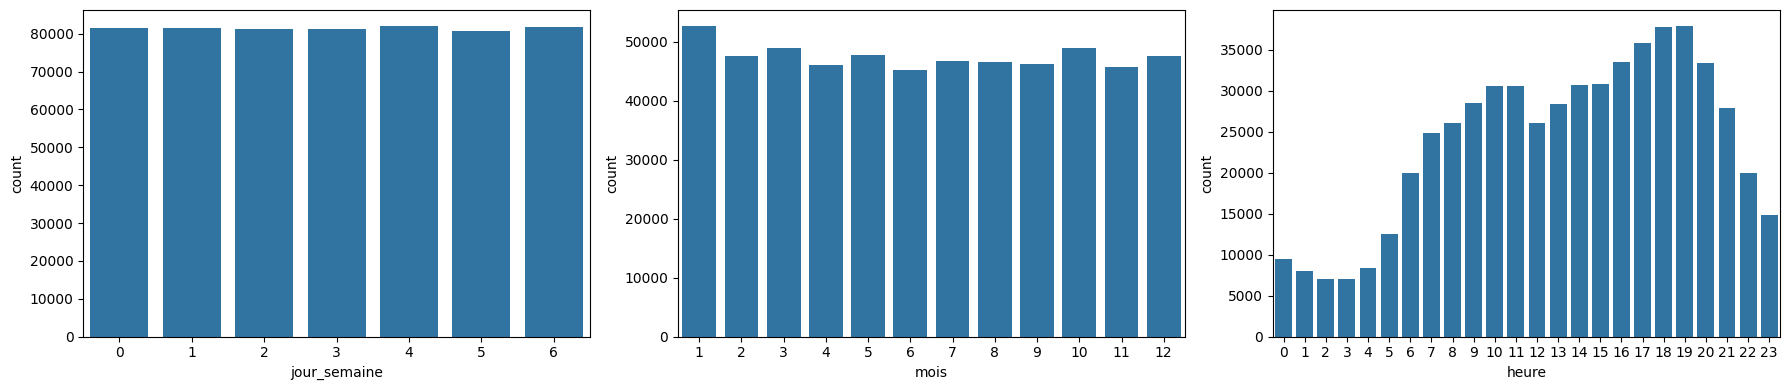

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
sns.countplot(data=df_csv, x="jour_semaine", ax=axes[0])
sns.countplot(data=df_csv, x="mois", ax=axes[1])
sns.countplot(data=df_csv, x="heure", ax=axes[2])
plt.tight_layout()

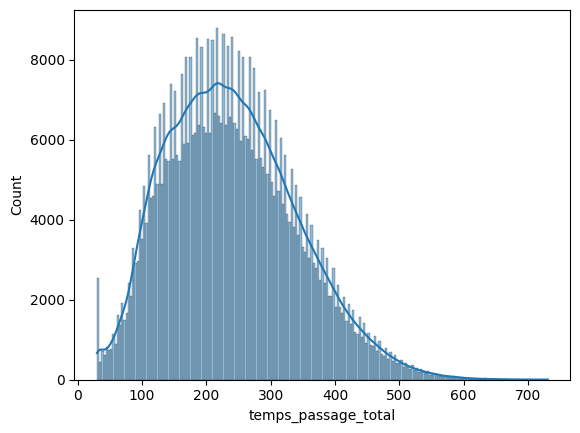

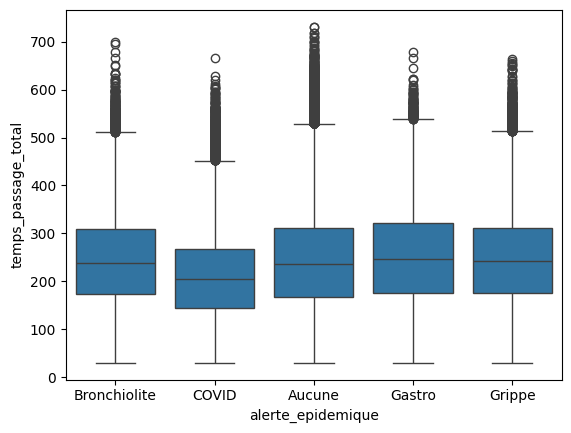

In [16]:
df_csv["temps_passage_total"].describe()

sns.histplot(df_csv["temps_passage_total"], kde=True)
plt.show()

sns.boxplot(x="alerte_epidemique", y="temps_passage_total", data=df_csv)
plt.show()

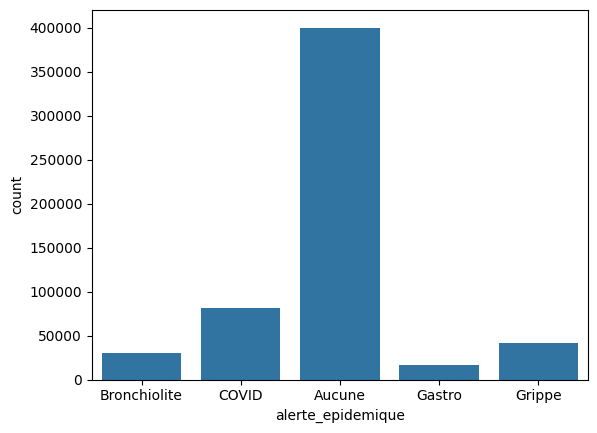

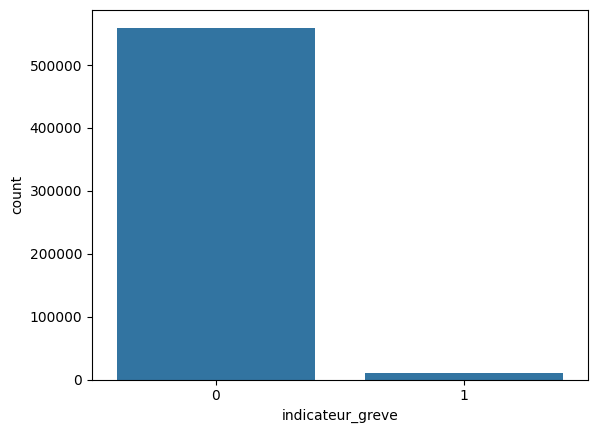

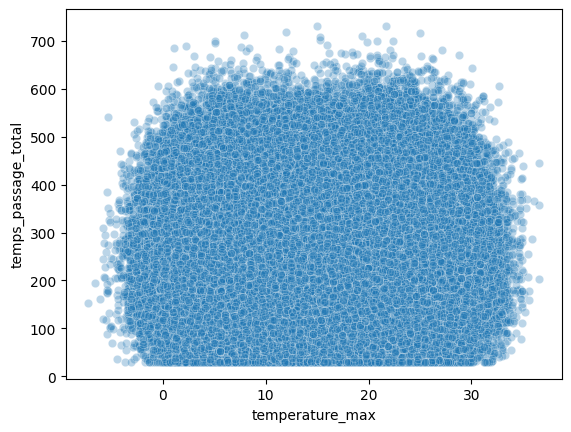

In [17]:
sns.countplot(x="alerte_epidemique", data=df_csv)
plt.show()

sns.countplot(x="indicateur_greve", data=df_csv)
plt.show()

sns.scatterplot(x="temperature_max", y="temps_passage_total", data=df_csv, alpha=0.3)
plt.show()

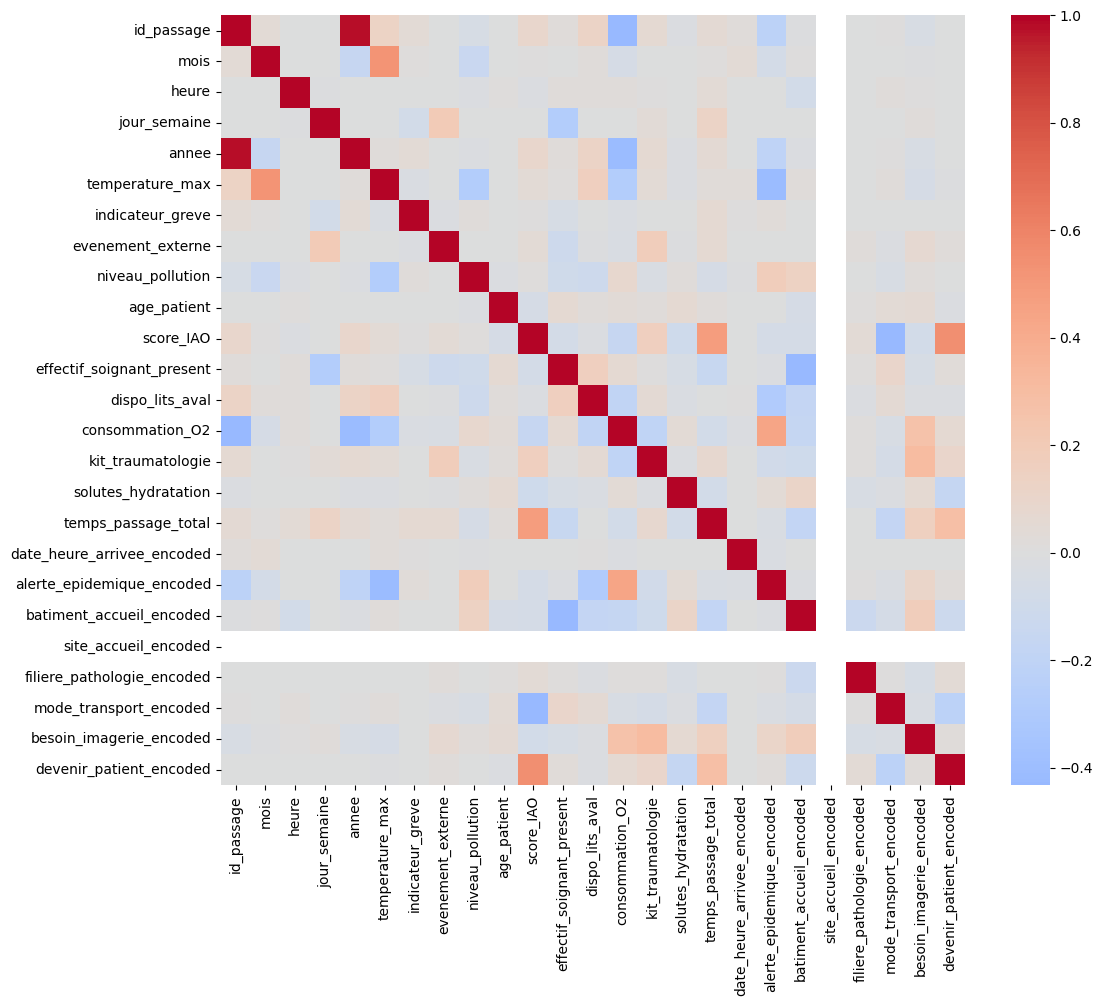

In [18]:
num_cols = df_csv.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_csv[num_cols].corr(), cmap="coolwarm", center=0)
plt.show()

# Feature engineering

In [19]:
# Conversion de la colonne en format datetime
df_csv['date_heure_arrivee'] = pd.to_datetime(df_csv['date_heure_arrivee'], format='%d/%m/%Y %H:%M')

# Fix the timestamp logic
# - Day part from original date
# - Hour part from 'heure' column
# - Minutes always '00'
df_csv['date_hourly'] = df_csv['date_heure_arrivee'].dt.normalize() + pd.to_timedelta(df_csv['heure'], unit='h')

# Vérifier si c'est le week-end (souvent critique aux urgences)
df_csv['est_weekend'] = (df_csv['date_heure_arrivee'].dt.dayofweek >= 5).astype("int64")

# 1 si l'arrivée est entre 8h et 20h, sinon 0
df_csv['heures_pleines'] = df_csv['date_heure_arrivee'].dt.hour.between(8, 20).astype("int64")

# Estimer la date et l'heure de sortie
df_csv["date_heure_sortie_estimee"] = (
    df_csv["date_heure_arrivee"] + pd.to_timedelta(df_csv["temps_passage_total"], unit="m")
)

# Create two dataframes: one for arrivals, one for exits
arrivals = pd.DataFrame({'time': df_csv['date_heure_arrivee'], 'change': 1})
exits = pd.DataFrame({'time': df_csv['date_heure_sortie_estimee'], 'change': -1})

# Combine and sort them by time
events = pd.concat([arrivals, exits]).sort_values(by='time')

# Calculate the running total (cumulative sum)
events['occupancy'] = events['change'].cumsum()

# Merge back to the original dataframe to get the count at arrival time
# 'merge_asof' is perfect here: it finds the occupancy state at the exact arrival moment
df = df_csv.sort_values('date_heure_arrivee')
df = pd.merge_asof(
    df, 
    events[['time', 'occupancy']], 
    left_on='date_heure_arrivee', 
    right_on='time', 
    direction='backward'
)

# Final calculation
CAPACITE_LITS = 30
df["nb_patients_en_cours"] = df['occupancy']
df["occup_lits_estimee"] = df["nb_patients_en_cours"] / CAPACITE_LITS

df.head()

,date_heure_arrivee,id_passage,mois,heure,jour_semaine,annee,alerte_epidemique,temperature_max,indicateur_greve,evenement_externe,...,besoin_imagerie_encoded,devenir_patient_encoded,date_hourly,est_weekend,heures_pleines,date_heure_sortie_estimee,time,occupancy,nb_patients_en_cours,occup_lits_estimee
0,2020-11-01 00:05:00,1000001,11,0,6,2020,Bronchiolite,15.983798,0,0,...,1,1,2020-11-01 00:00:00,1,0,2020-11-01 05:46:00,2020-11-01 00:05:00,2,2,0.066667
1,2020-11-01 00:05:00,1000002,11,0,6,2020,Bronchiolite,15.983798,0,0,...,1,1,2020-11-01 00:00:00,1,0,2020-11-01 05:40:00,2020-11-01 00:05:00,2,2,0.066667
2,2020-11-01 00:47:00,1000003,11,0,6,2020,Bronchiolite,12.006751,0,0,...,0,2,2020-11-01 00:00:00,1,0,2020-11-01 05:01:00,2020-11-01 00:47:00,3,3,0.100000
3,2020-11-01 00:54:00,1000004,11,0,6,2020,Bronchiolite,12.834808,0,0,...,1,1,2020-11-01 00:00:00,1,0,2020-11-01 05:52:00,2020-11-01 00:54:00,4,4,0.133333
4,2020-11-01 01:24:00,1000005,11,1,6,2020,Bronchiolite,14.335864,0,0,...,0,1,2020-11-01 01:00:00,1,0,2020-11-01 05:12:00,2020-11-01 01:24:00,5,5,0.166667


In [20]:
df

,date_heure_arrivee,id_passage,mois,heure,jour_semaine,annee,alerte_epidemique,temperature_max,indicateur_greve,evenement_externe,...,besoin_imagerie_encoded,devenir_patient_encoded,date_hourly,est_weekend,heures_pleines,date_heure_sortie_estimee,time,occupancy,nb_patients_en_cours,occup_lits_estimee
0,2020-11-01 00:05:00,1000001,11,0,6,2020,Bronchiolite,15.983798,0,0,...,1,1,2020-11-01 00:00:00,1,0,2020-11-01 05:46:00,2020-11-01 00:05:00,2,2,0.066667
1,2020-11-01 00:05:00,1000002,11,0,6,2020,Bronchiolite,15.983798,0,0,...,1,1,2020-11-01 00:00:00,1,0,2020-11-01 05:40:00,2020-11-01 00:05:00,2,2,0.066667
2,2020-11-01 00:47:00,1000003,11,0,6,2020,Bronchiolite,12.006751,0,0,...,0,2,2020-11-01 00:00:00,1,0,2020-11-01 05:01:00,2020-11-01 00:47:00,3,3,0.100000
3,2020-11-01 00:54:00,1000004,11,0,6,2020,Bronchiolite,12.834808,0,0,...,1,1,2020-11-01 00:00:00,1,0,2020-11-01 05:52:00,2020-11-01 00:54:00,4,4,0.133333
4,2020-11-01 01:24:00,1000005,11,1,6,2020,Bronchiolite,14.335864,0,0,...,0,1,2020-11-01 01:00:00,1,0,2020-11-01 05:12:00,2020-11-01 01:24:00,5,5,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570277,2025-10-31 23:28:00,1570278,10,23,4,2025,Aucune,18.639316,0,0,...,1,0,2025-10-31 23:00:00,0,0,2025-11-01 04:43:00,2025-10-31 23:28:00,70,70,2.333333
570278,2025-10-31 23:32:00,1570279,10,23,4,2025,Aucune,20.870102,0,0,...,1,1,2025-10-31 23:00:00,0,0,2025-11-01 07:07:00,2025-10-31 23:32:00,70,70,2.333333
570279,2025-10-31 23:38:00,1570280,10,23,4,2025,Aucune,19.439946,0,0,...,0,1,2025-10-31 23:00:00,0,0,2025-11-01 09:04:00,2025-10-31 23:38:00,68,68,2.266667
570280,2025-10-31 23:41:00,1570281,10,23,4,2025,Aucune,25.419911,0,0,...,1,2,2025-10-31 23:00:00,0,0,2025-11-01 04:38:00,2025-10-31 23:41:00,69,69,2.300000


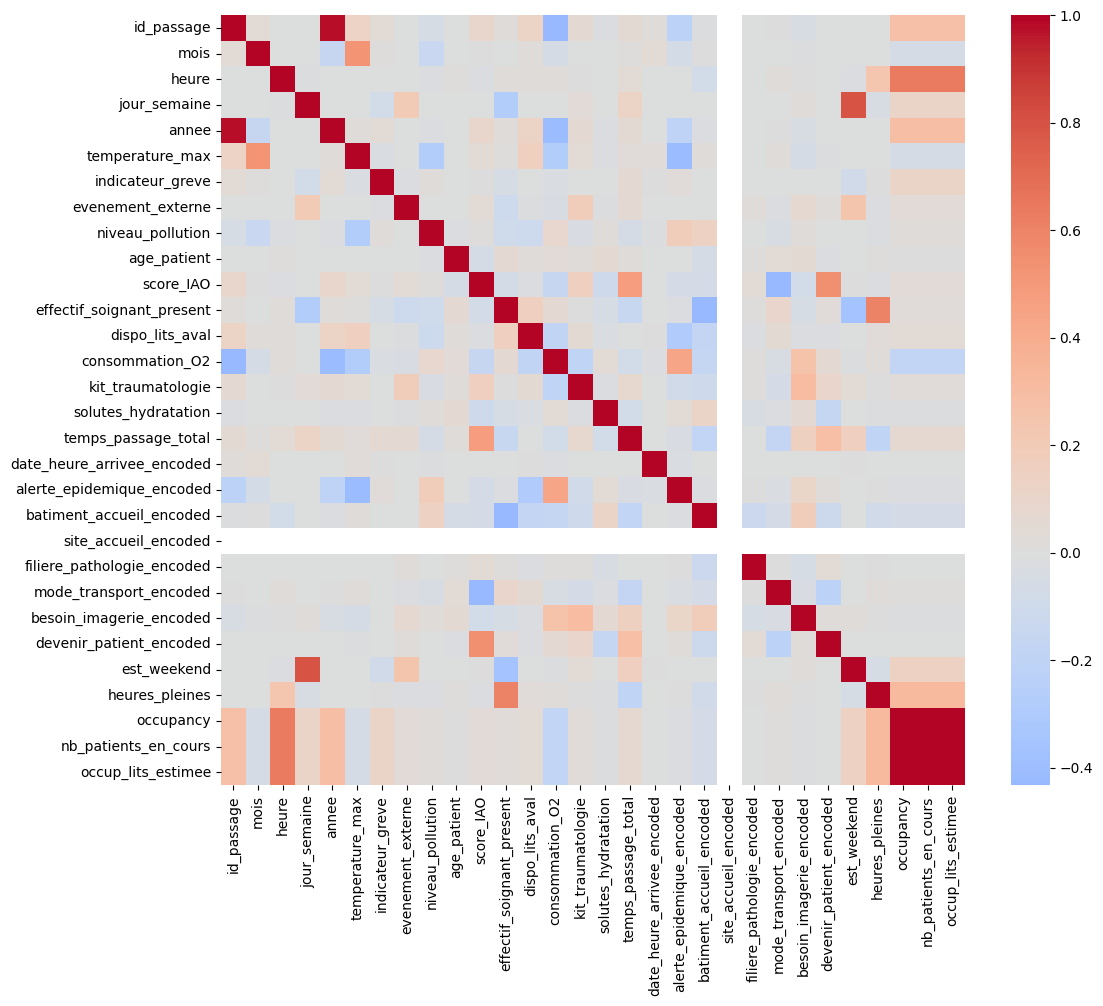

In [21]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.show()

In [22]:
# Set the index
df = df.set_index('date_hourly')

# Use resample('h') to make each row an HOUR
# We use .agg to calculate the Mean (duration) and the Count (patients) simultaneously
df_hourly = df.resample('h').agg({
    'id_passage': 'count',          # The number of patients for that hour
    'temps_passage_total': 'mean',  # The average duration for that hour
    'mois': 'mean',
    'heure': 'mean',
    'jour_semaine': 'mean',
    'annee': 'mean',
    'temperature_max': 'max',
    'indicateur_greve': 'max',
    'evenement_externe': 'max',
    'niveau_pollution': 'max',
    'age_patient': 'mean',
    'score_IAO': 'max',
    'effectif_soignant_present': 'mean',
    'dispo_lits_aval': 'min',
    'consommation_O2': 'min',
    'kit_traumatologie': 'min',
    'solutes_hydratation': 'min',
    'alerte_epidemique_encoded': 'mean',
    'batiment_accueil_encoded': 'mean',
    'site_accueil_encoded': 'mean',
    'filiere_pathologie_encoded': 'mean',
    'mode_transport_encoded': 'mean',
    'besoin_imagerie_encoded': 'mean',
    'devenir_patient_encoded': 'mean',
    'est_weekend': 'max',
    'heures_pleines': 'max',
    'nb_patients_en_cours': 'max',
    'occup_lits_estimee': 'max'
}).rename(columns={
    'temps_passage_total': 'avg_passage_time',
    'id_passage': 'patient_count'
})


# Handle NaNs (required for SARIMAX and before casting to int)
df_hourly['patient_count'] = df_hourly['patient_count'].fillna(0)
# Forward fill to handle hours with no patients
df_hourly = df_hourly.ffill().bfill()

# Identify all columns that end with '_encoded'
encoded_cols = [col for col in df_hourly.columns if col.endswith('_encoded')]
# Apply rounding and integer casting to all of them
df_hourly[encoded_cols] = df_hourly[encoded_cols].round().astype(int)

df_hourly.head()

,patient_count,avg_passage_time,mois,heure,jour_semaine,annee,temperature_max,indicateur_greve,evenement_externe,niveau_pollution,...,batiment_accueil_encoded,site_accueil_encoded,filiere_pathologie_encoded,mode_transport_encoded,besoin_imagerie_encoded,devenir_patient_encoded,est_weekend,heures_pleines,nb_patients_en_cours,occup_lits_estimee
date_hourly,,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,4,307.000000,11.0,0.0,6.0,2020.0,15.983798,0.0,0.0,5.0,...,1,0,5,1,1,1,1.0,0.0,4.0,0.133333
2020-11-01 01:00:00,3,263.666667,11.0,1.0,6.0,2020.0,16.753026,0.0,0.0,7.0,...,1,0,9,2,1,1,1.0,0.0,7.0,0.233333
2020-11-01 02:00:00,6,201.000000,11.0,2.0,6.0,2020.0,21.034677,0.0,0.0,5.0,...,2,0,5,2,0,1,1.0,0.0,13.0,0.433333
2020-11-01 03:00:00,3,269.333333,11.0,3.0,6.0,2020.0,16.628042,0.0,0.0,4.0,...,1,0,7,2,1,1,1.0,0.0,16.0,0.533333
2020-11-01 04:00:00,4,187.250000,11.0,4.0,6.0,2020.0,17.000000,0.0,0.0,9.0,...,2,0,7,2,1,0,1.0,0.0,18.0,0.600000


# Machine learning

On cherche à prédire un volume d’admissions agrégé par heure.

## RandomForest

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
df_hourly["nb_arrivees_lag_1h"] = df_hourly["patient_count"].shift(1)
df_hourly["nb_arrivees_lag_6h"] = df_hourly["patient_count"].shift(6)
df_hourly["nb_arrivees_lag_24h"] = df_hourly["patient_count"].shift(24)
df_hourly["nb_arrivees_lag_48h"] = df_hourly["patient_count"].shift(48)

In [25]:
df_hourly['nb_arrivees_lag_1h'] = df_hourly['nb_arrivees_lag_1h'].fillna(0)
df_hourly['nb_arrivees_lag_24h'] = df_hourly['nb_arrivees_lag_24h'].fillna(0)
df_hourly['nb_arrivees_lag_6h'] = df_hourly['nb_arrivees_lag_6h'].fillna(0)
df_hourly['nb_arrivees_lag_48h'] = df_hourly['nb_arrivees_lag_48h'].fillna(0)

In [26]:
df_hourly

,patient_count,avg_passage_time,mois,heure,jour_semaine,annee,temperature_max,indicateur_greve,evenement_externe,niveau_pollution,...,besoin_imagerie_encoded,devenir_patient_encoded,est_weekend,heures_pleines,nb_patients_en_cours,occup_lits_estimee,nb_arrivees_lag_1h,nb_arrivees_lag_6h,nb_arrivees_lag_24h,nb_arrivees_lag_48h
date_hourly,,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,4,307.000000,11.0,0.0,6.0,2020.0,15.983798,0.0,0.0,5.0,...,1,1,1.0,0.0,4.0,0.133333,0.0,0.0,0.0,0.0
2020-11-01 01:00:00,3,263.666667,11.0,1.0,6.0,2020.0,16.753026,0.0,0.0,7.0,...,1,1,1.0,0.0,7.0,0.233333,4.0,0.0,0.0,0.0
2020-11-01 02:00:00,6,201.000000,11.0,2.0,6.0,2020.0,21.034677,0.0,0.0,5.0,...,0,1,1.0,0.0,13.0,0.433333,3.0,0.0,0.0,0.0
2020-11-01 03:00:00,3,269.333333,11.0,3.0,6.0,2020.0,16.628042,0.0,0.0,4.0,...,1,1,1.0,0.0,16.0,0.533333,6.0,0.0,0.0,0.0
2020-11-01 04:00:00,4,187.250000,11.0,4.0,6.0,2020.0,17.000000,0.0,0.0,9.0,...,1,0,1.0,0.0,18.0,0.600000,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-31 19:00:00,17,232.352941,10.0,19.0,4.0,2025.0,24.914358,0.0,0.0,8.0,...,0,1,0.0,1.0,71.0,2.366667,16.0,17.0,18.0,31.0
2025-10-31 20:00:00,23,315.478261,10.0,20.0,4.0,2025.0,27.041311,0.0,0.0,7.0,...,1,1,0.0,1.0,77.0,2.566667,17.0,34.0,28.0,17.0
2025-10-31 21:00:00,21,283.428571,10.0,21.0,4.0,2025.0,26.306984,0.0,0.0,6.0,...,1,1,0.0,0.0,77.0,2.566667,23.0,20.0,18.0,12.0


In [27]:
target_col = "patient_count"

feature_cols = [
    "heure",
    "jour_semaine",
    "mois",
    "est_weekend",
    "heures_pleines",
    "nb_patients_en_cours",
    "occup_lits_estimee",
    "nb_arrivees_lag_1h",
    "nb_arrivees_lag_24h",
    "nb_arrivees_lag_48h",
    "nb_arrivees_lag_6h",
    "indicateur_greve",
    "evenement_externe",
    "alerte_epidemique_encoded",
]

X = df_hourly[feature_cols]
y = df_hourly[target_col]
time_col = df_hourly.index

In [28]:
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

X.shape: (43824, 14), y.shape: (43824,)


In [29]:
# Train/test split
X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(
    X, y, time_col, test_size=0.2, shuffle=False
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (35059, 14), Test: (8765, 14)


In [30]:
# Entrainement
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)  # ← ENTRAÎNEMENT

y_pred = model.predict(X_test)  # ← PRÉDICTION sur le futur

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 3.33, RMSE: 4.32


Interprétation :

MAE = 3.33 -> En moyenne, le modèle se trompe de ± 3-3.5 patients par heure

RMSE = 4.32 -> Plus sensible aux gros pics (erreur moyenne pondérée), le modèle à quelques pics mal prédits qui pèsent lourds

On peut donc dire que le modèle est précis à ± 3 patients en moyenne (MAE). Cependant, lors des gros pics, l'erreur monte légèrement à ± 4 patients (RMSE), ce qui reste acceptable pour anticiper les ressources.

Pour notre contexte hospitalier, c'est très bon :

Si nous avons 5-15 arrivées/heure, une erreur de ± 3 est opérationnelle

La direction peut donc s'appuyer dessus pour anticiper les pics

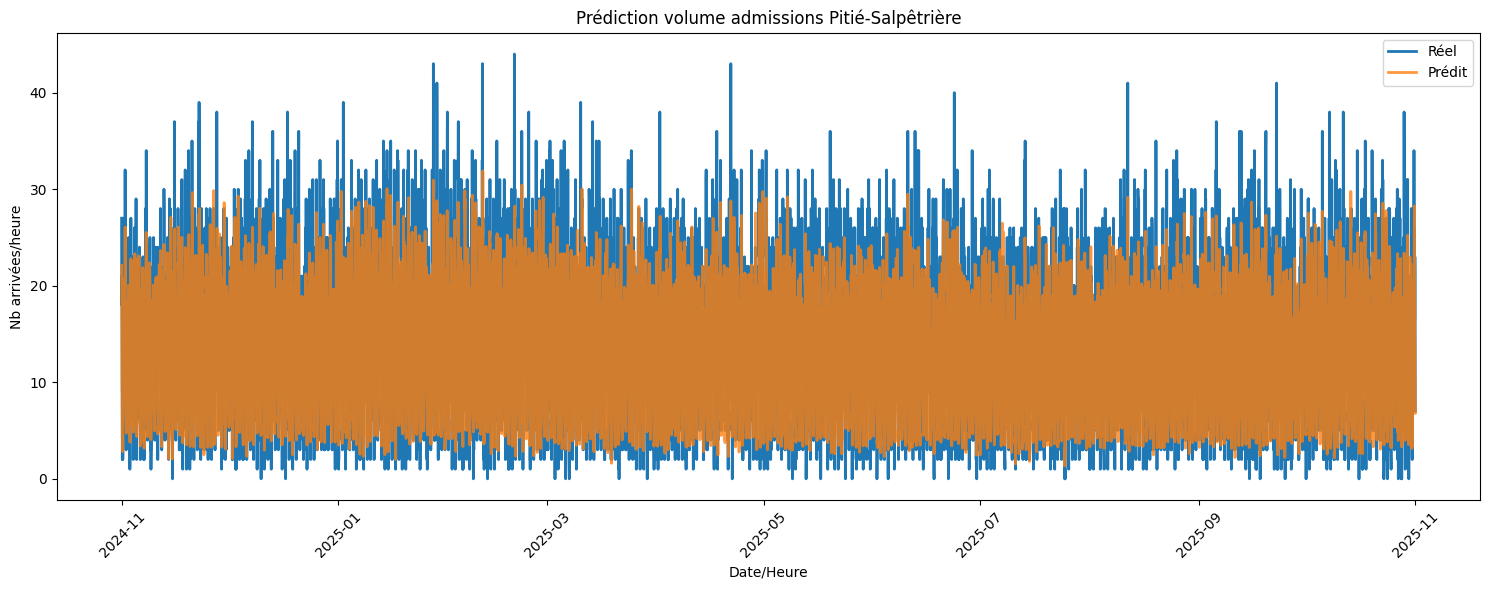

In [31]:
plt.figure(figsize=(15, 6))
plt.plot(time_test, y_test.values, label="Réel", linewidth=2)
plt.plot(time_test, y_pred, label="Prédit", linewidth=2, alpha=0.8)
plt.xlabel("Date/Heure")
plt.ylabel("Nb arrivées/heure")
plt.title("Prédiction volume admissions Pitié-Salpêtrière")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
importances = pd.DataFrame({
    "feature": feature_cols,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)
print(importances)

                      feature  importance
0                       heure    0.494528
4              heures_pleines    0.089582
6          occup_lits_estimee    0.074551
5        nb_patients_en_cours    0.069168
7          nb_arrivees_lag_1h    0.047151
8         nb_arrivees_lag_24h    0.046597
9         nb_arrivees_lag_48h    0.046052
10         nb_arrivees_lag_6h    0.045337
2                        mois    0.033629
1                jour_semaine    0.025910
13  alerte_epidemique_encoded    0.011120
12          evenement_externe    0.008250
3                 est_weekend    0.006417
11           indicateur_greve    0.001708


Top 3 des facteurs qui influencent le modèle :
  - L'heure de la journée explique 50% des décisions du modèle.
  - Les variables liées à la charge immédiate (heures pleines, nb_patients_en_cours, occup_lits_estimee) comptent ensemble pour une part importante, montrant que la saturation actuelle pèse fortement sur les admissions prévues.
  - Les lags indiquent que les pics ont tendance à se prolonger sur plusieurs heures.

Impact : le modèle permet d’anticiper les ressources en fonction de l’heure, de la charge déjà présente et de la dynamique récente des admissions.

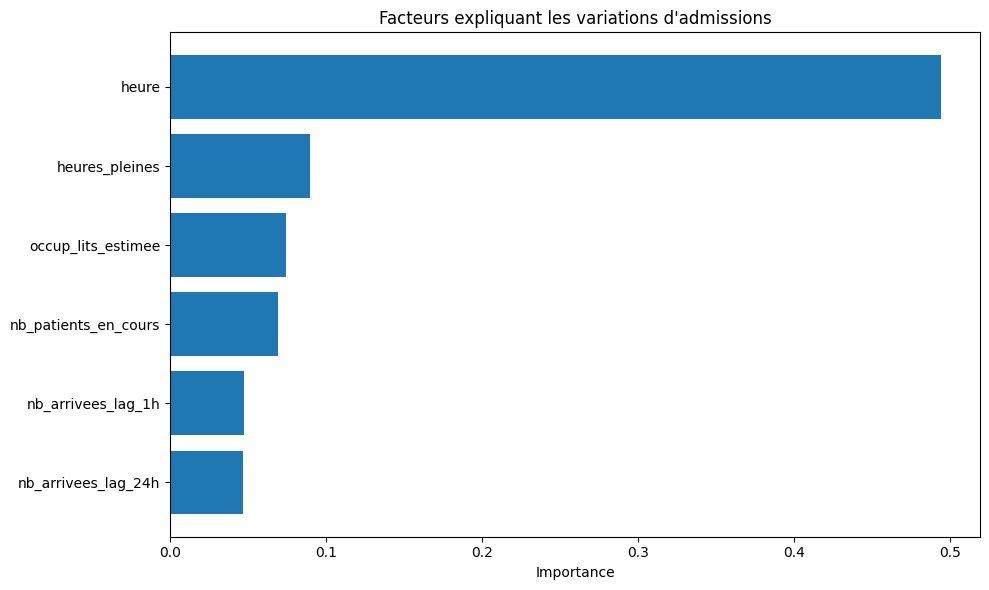

In [33]:
# Barplot des importances (copie dans prez)
plt.figure(figsize=(10, 6))
top_features = importances.head(6)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Facteurs expliquant les variations d\'admissions')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Recommandations:

Seuil d’activation : si le modèle prédit ≥ 12 patients/heure (en particulier sur les heures pleines où l’occupation et nb_patients_en_cours sont déjà élevés).

Actions déclenchées :
- Appeler +2 infirmiers en renfort (délai 15–30 min, cohérent avec les procédures AP‑HP).
- Ouvrir 2 lits temporaires pour absorber le surplus sur cette plage horaire.
- Notifier le chef de service pour ajuster la priorisation des prises en charge.

Justification :
- Le modèle montre que les pics surviennent surtout à certaines heures de la journée et se prolongent sur plusieurs heures quand la charge est déjà forte.
- En activant ces mesures dès qu’une heure “à risque” est prédite (≥ 12 patients/heure avec forte occupation), on réduit la probabilité de saturation prolongée.

Impact :
Si chaque activation de renfort permet d’éviter 30 minutes d’attente moyenne pour les patients concernés et que cela concerne en moyenne 15 patients/jour sur les jours à forte activité, alors le gain de productivité est de l’ordre de 15 patients × 0,5 h × 250 jours ≈ 1 875 heures de soins récupérées/an, valorisables en plusieurs dizaines de milliers d’euros d’activité supplémentaire ou en qualité de prise en charge améliorée.

Déploiement en 3 phases:

Phase 1 (1 mois) : Pilote aux Urgences de la Pitié-Salpêtrière
- Utilisation du modèle en parallèle des pratiques actuelles, avec suivi quotidien des prédictions (patients/heure, occupation) et comparaison au réel.
- Ajustement des seuils (par ex. ≥ 12 patients/heure en heures pleines avec forte occupation) et des règles de renfort selon les retours du terrain.

Phase 2 (3 mois) : Extension contrôlée à 3 services (Urgences + Cardio + Pneumo)
- Connexion au système d’information hospitalier pour récupérer automatiquement les flux horaires et l’occupation.
- Formation d’une vingtaine de chefs de service et cadres à la lecture des courbes de prévision, des seuils d’alerte et des limites du modèle.

Phase 3 (6 mois) : Passage à l’échelle AP‑HP (groupe de 12 hôpitaux)
- Mutualisation et anonymisation des données de plusieurs sites pour améliorer la robustesse et la précision des prévisions.
- Adaptation des seuils et règles d’activation à chaque hôpital (capacités différentes, profils de patients distincts), avec un suivi régulier des indicateurs de performance (temps d’attente, taux de saturation, renforts déclenchés).

## SARIMAX

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

In [35]:
# Calcul du point de scission
split_index = int(len(df_hourly) * 0.8)

# Découpage chronologique
train = df_hourly.iloc[:split_index]
test = df_hourly.iloc[split_index:]

print(f"Total créneaux horaires : {len(df_hourly)}")
print(f"Train set (80%)   : {len(train)}")
print(f"Test set (20%)    : {len(test)}")

Total créneaux horaires : 43824
Train set (80%)   : 35059
Test set (20%)    : 8765


In [36]:
def run_adf_test(series):
    print(f"Résultats du test de Dickey-Fuller pour la série : {series.name}")
    result = adfuller(series)
    
    labels = [
        'Statistique de test', 
        'p-value', 
        'Nombre de retards utilisés', 
        'Nombre d\'observations'
    ]
    
    for value, label in zip(result, labels):
        print(f'{label} : {value}')

    for key, value in result[4].items():
        print(f'Valeur critique ({key}) : {value}')

    if result[1] <= 0.05:
        print("\nConclusion : On rejette l'hypothèse nulle (H0). La série est stationnaire.")
    else:
        print("\nConclusion : On ne peut pas rejeter l'hypothèse nulle (H0). La série n'est pas stationnaire.")

# Tester la stationnarité du temps de passage moyen
run_adf_test(df_hourly['patient_count'])

Résultats du test de Dickey-Fuller pour la série : patient_count
Statistique de test : -12.04091294043567
p-value : 2.733604490266829e-22
Nombre de retards utilisés : 54
Nombre d'observations : 43769
Valeur critique (1%) : -3.4304994135930658
Valeur critique (5%) : -2.8616060375324097
Valeur critique (10%) : -2.566805149630511

Conclusion : On rejette l'hypothèse nulle (H0). La série est stationnaire.


In [37]:
# Définition de la variable cible et des variables explicatives
y_train = train['patient_count']
exog_train = train[['heure', 'jour_semaine', 'alerte_epidemique_encoded', 'indicateur_greve', 'evenement_externe', 'occup_lits_estimee']]

y_test = test['patient_count']
exog_test = test[['heure', 'jour_semaine', 'alerte_epidemique_encoded', 'indicateur_greve', 'evenement_externe', 'occup_lits_estimee']]

/Users/maelioviau-vonfelt/Desktop/Masters/Epitech Data/Cours/M2/predictions_data_hopital/hopital_salp/env/lib/python3.14/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                      patient_count   No. Observations:                35059
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -98659.855
Date:                            Wed, 04 Feb 2026   AIC                         197341.711
Time:                                    15:00:21   BIC                         197434.807
Sample:                                11-01-2020   HQIC                        197371.364
                                     - 10-31-2024                                         
Covariance Type:                              opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
heure                        -0.1492      0.038     -3.932      0.000      -0.224   

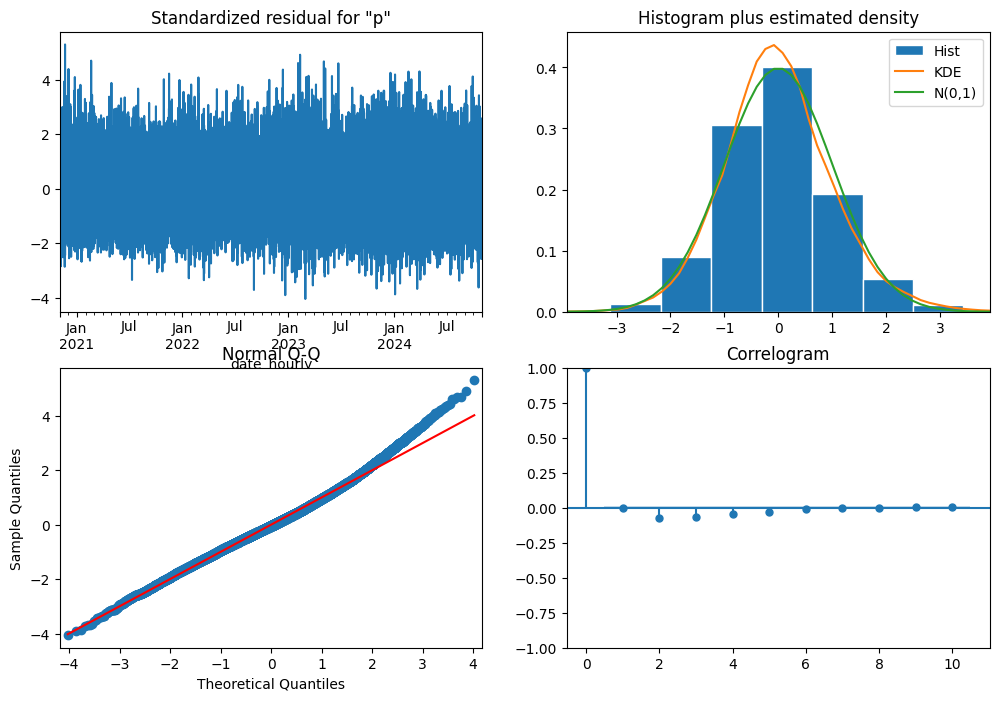

In [38]:
# Définition du modèle
model_simple = SARIMAX(y_train, 
                exog=exog_train, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 24), # Cycle de 24h
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model_simple.fit()

# Affichage des statistiques (chercher un AIC faible)
print(results.summary())

# Diagnostic des résidus (vérifier qu'ils ressemblent à un bruit blanc)
results.plot_diagnostics(figsize=(12, 8))
plt.show()

Interprétations des coefficients:

alerte_epidemique_encoded (≈ +0,30, significatif)
- En situation d’alerte épidémique, le modèle prévoit en moyenne ≈ 0,3 patient de plus par heure, toutes choses égales par ailleurs.
- Donc les épisodes épidémiques ont un effet réel mais modéré en moyenne (important sur la durée).

evenement_externe (≈ +0,22, significatif)
- Lors d’événements externes (canicule, événement majeur…), on ajoute ≈ 0,2 patient/heure en moyenne.
- Là encore, effet moins fort qu’une épidémie, mais non négligeable.

Le modèle SARIMAX confirme que le flux horaire dépend d’un cycle quotidien et des chocs à court terme, mais aussi fortement de l’occupation actuelle. Les épisodes d’alerte épidémique et certains événements externes augmentent significativement les admissions, tandis que l’effet des grèves n’est pas statistiquement concluant sur notre période.

## Comparaison avec Randomforest

In [39]:
y_pred_sarimax = results.predict(
    start=y_test.index[0],
    end=y_test.index[-1],
    exog=exog_test
)

In [40]:
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

mae_sarimax = mean_absolute_error(y_test, y_pred_sarimax)
rmse_sarimax = np.sqrt(mean_squared_error(y_test, y_pred_sarimax))

mae_rf, rmse_rf, mae_sarimax, rmse_sarimax

(3.3269526525955504,
 np.float64(4.319023296552888),
 3.4779376030316342,
 np.float64(4.483831507127292))

RandomForest:

- MAE ≈ 3,33 → erreur moyenne d’environ 3–3,5 patients/heure.
- RMSE ≈ 4,32 → gère légèrement mieux les gros pics que le SARIMAX.

SARIMAX:

- MAE ≈ 3,48 → se trompe un peu plus souvent en moyenne.
- RMSE ≈ 4,48 → erreurs légèrement plus grandes sur les pics.

Interprétation:

RandomForest est plus précis pour prévoir le volume horaire (erreur ≈ 3–4 patients/heure). SARIMAX est plus interprétable : il confirme le rôle des épidémies et des événements externes, par exemple, mais avec une précision légèrement inférieure.

## Avec Auto-ARIMA

In [ ]:
# Configuration de l'Auto-ARIMA
model_auto = pm.auto_arima(
    y_train, 
    seasonal=True,           # Active la composante saisonnière
    m=24,                     # Fréquence saisonnière
    stepwise=True,           # Utilise un algorithme plus rapide pour chercher les paramètres
    suppress_warnings=True, 
    error_action="ignore", 
    trace=True               # Affiche les combinaisons testées
)

model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=196.09 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=226923.312, Time=0.25 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=221167.958, Time=15.85 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=220511.164, Time=17.19 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=226921.312, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=222186.699, Time=0.84 sec
 ARIMA(0,1,1)(1,0,1)[24] intercept   : AIC=inf, Time=114.21 sec
 ARIMA(0,1,1)(0,0,2)[24] intercept   : AIC=219201.918, Time=76.56 sec
 ARIMA(0,1,1)(1,0,2)[24] intercept   : AIC=inf, Time=308.71 sec
 ARIMA(0,1,0)(0,0,2)[24] intercept   : AIC=226352.293, Time=59.37 sec


: 

In [ ]:
# Récupération des ordres trouvés par Auto-ARIMA
order = model_auto.order           # (p, d, q)
seasonal_order = model_auto.seasonal_order # (P, D, Q, s)

# Création du modèle SARIMAX (avec optionnelles exogènes)
model = SARIMAX(
    y_train,
    exog=exog_train,        # Ajoute tes variables externes ici si besoin
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_results = model.fit()
sarima_results.summary()